In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
%matplotlib inline

In [3]:
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [4]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
# Show 10 observations
df.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
76,77,Adelie,Torgersen,40.9,16.8,191.0,3700.0,female,2008
94,95,Adelie,Dream,36.2,17.3,187.0,3300.0,female,2008
263,264,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,male,2009
170,171,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,female,2007
204,205,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,female,2008
145,146,Adelie,Dream,39.0,18.7,185.0,3650.0,male,2009
51,52,Adelie,Biscoe,40.1,18.9,188.0,4300.0,male,2008
284,285,Chinstrap,Dream,46.0,18.9,195.0,4150.0,female,2007
96,97,Adelie,Dream,38.1,18.6,190.0,3700.0,female,2008
241,242,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,male,2009


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

In [6]:
# Drop na values, but explain your rule of decision
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])
df = df.drop(['rowid','year'], axis=1)
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [7]:
# Get a basic summary of the data
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
# How many penguins by species and island we have?
df[['species',  'island']].value_counts()

species    island   
Gentoo     Biscoe       119
Chinstrap  Dream         68
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Name: count, dtype: int64

In [9]:
pd.crosstab(df['species'],  [df['island'], df['species']])

island    Biscoe         Dream           Torgersen
species   Adelie Gentoo Adelie Chinstrap    Adelie
species                                           
Adelie        44      0     55         0        47
Chinstrap      0      0      0        68         0
Gentoo         0    119      0         0         0

In [10]:
# Get the basic metrics (mean, median, std, max, min) per species
print('bill_length_mm')
display(df.groupby('species')['bill_length_mm'].agg(['mean', 'median', 'std', 'max', 'min']))
print('bill_depth_mm')
display(df.groupby('species')['bill_depth_mm'].agg(['mean', 'median', 'std', 'max', 'min']))
print('flipper_length_mm')
display(df.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'std', 'max', 'min']))
print('body_mass_g')
display(df.groupby('species')['body_mass_g'].agg(['mean', 'median', 'std', 'max', 'min']))

bill_length_mm


,mean,median,std,max,min
species,,,,,
Adelie,38.823973,38.85,2.662597,46.0,32.1
Chinstrap,48.833824,49.55,3.339256,58.0,40.9
Gentoo,47.568067,47.40,3.106116,59.6,40.9


bill_depth_mm


,mean,median,std,max,min
species,,,,,
Adelie,18.347260,18.40,1.219338,21.5,15.5
Chinstrap,18.420588,18.45,1.135395,20.8,16.4
Gentoo,14.996639,15.00,0.985998,17.3,13.1


flipper_length_mm


,mean,median,std,max,min
species,,,,,
Adelie,190.102740,190.0,6.521825,210.0,172.0
Chinstrap,195.823529,196.0,7.131894,212.0,178.0
Gentoo,217.235294,216.0,6.585431,231.0,203.0


body_mass_g


,mean,median,std,max,min
species,,,,,
Adelie,3706.164384,3700.0,458.620135,4775.0,2850.0
Chinstrap,3733.088235,3700.0,384.335081,4800.0,2700.0
Gentoo,5092.436975,5050.0,501.476154,6300.0,3950.0


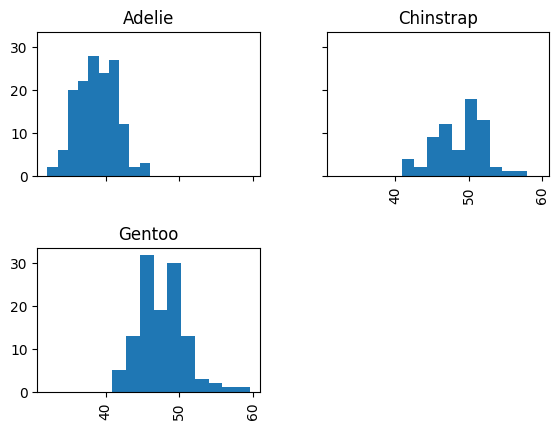

In [11]:
# Show the histogram per bill lenght
df.hist(column='bill_length_mm', by='species', sharex=True, sharey=True)
plt.show()

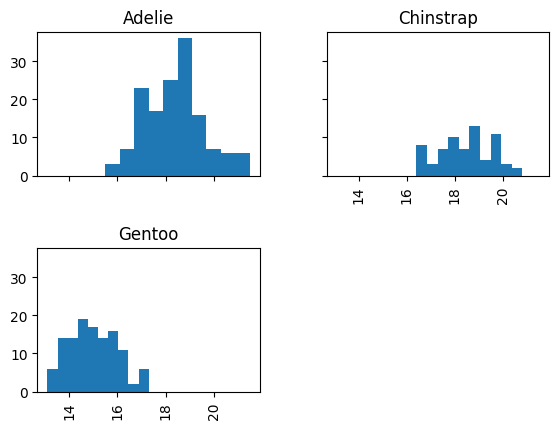

In [12]:
# Show the histogram per bill depth
df.hist(column='bill_depth_mm', by='species', sharex=True, sharey=True)
plt.show()

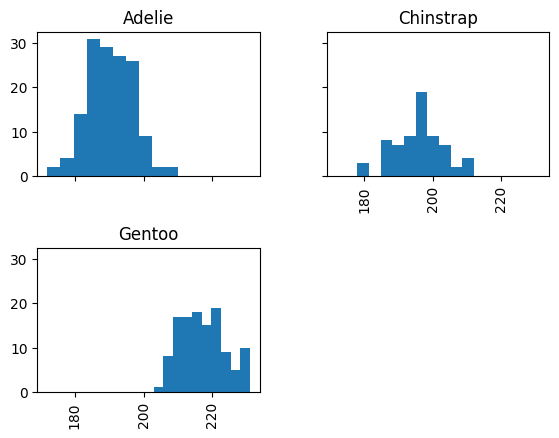

In [13]:
# Show the histogram per flipper length
df.hist(column='flipper_length_mm', by='species', sharex=True, sharey=True)
plt.show()

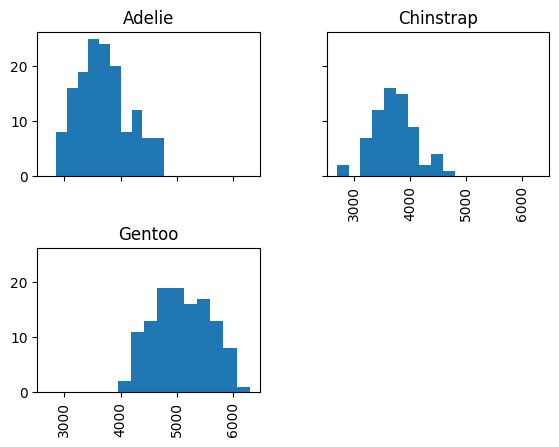

In [14]:
# Show a boxplot of body mass per species
df.hist(column='body_mass_g', by='species', sharex=True, sharey=True)
plt.show()

In [20]:
# Show a bivariate plot of bill length and bill depth
fig = px.scatter(df, x= 'bill_length_mm', y= 'bill_depth_mm')
fig.show()

In [23]:
# Is there a way to be more effective?
fig = px.scatter(df, x= 'bill_length_mm', y= 'bill_depth_mm', color= 'species')
fig.show()

In [24]:
fig = px.scatter_matrix(df, dimensions= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], color= 'species')
fig.show()

In [25]:
# What percentage of Gentoo penguins weights less than 5000 (visually)
# Use ecdf = empiric cumulative distribution function
fig = px.ecdf(df[df['species'] == 'Gentoo'], x= 'body_mass_g')
fig.show()

In [18]:
# Is there a difference between Adelie penguins from each island?
# alpha = 0.05
# reject_H0 = p_value < alpha


In [19]:
# Show the boxplot of Adelie penguins by island

In [28]:
# Check if there is a bimodal distribution of the "body_mass_g" by sex of the Adelie species
#df[df['species'] == 'Adelie'].hist()
fig = px.histogram(df[df['species'] == 'Adelie'], x= 'body_mass_g', color= 'sex')
fig.show()
#plt.plot()